# **Question 3:**

# Part A) EfficientNetB0 Architecture:

In [ ]:
model = tf.keras.applications.EfficientNetB0(include_top=True, weights='imagenet')
model.summary()

21834768/21834768 [==============================] - 1s 0us/step
Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_18 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling_17 (Rescaling)       (None, 224, 224, 3)  0           ['input_18[0][0]']               
                                                                                                  
 normalization_17 (Normalizatio  (None, 224, 224, 3)  7          ['rescaling_17[0][0]']           
 n)                                                                                               
                    


The architecture of the EfficientNet can be seen from the above summary. EfficientNet is a convolutional neural network architecture and scaling method that uniformly scales all dimensions of depth/width/resolution using a compound coefficient. Unlike conventional practice that arbitrary scales these factors, the EfficientNet scaling method uniformly scales network width, depth, and resolution with a set of fixed scaling coefficients. The base EfficientNet-B0 network is based on the inverted bottleneck residual blocks of **MobileNetV2**, in addition to squeeze-and-excitation blocks. 

Comparing EfficientNet with other models, with considerably fewer numbers of parameters, the family of models are efficient and also provide better results.

Comparing different models od EfficientNet, each of them contains 7 blocks. These blocks further have a varying number of sub-blocks whose number is increased as we move from EfficientNetB0 to EfficientNetB7. They also have other differences. For example, the total number of layers in EfficientNet-B0 the total is 237 and in EfficientNet-B7 the total comes out to 813. In the models, they gradually increased the number of sub-blocks. There are also other differences in the kernel size and the number of channels, but, the resolution remains the same as for the whole family.

As for the preprocessing on the input data, EfficientNet models expect their inputs to be float tensors of pixels with values in the [0-255] range. Also, It should have exactly 3 inputs channels.As it can be seen, the size of the input in this model is **(None, 224, 224, 3).**

Different Versions of EfficientNet:

# Part B)

First, I import the needed libraries as below:

In [1]:
from tensorflow.keras.applications import EfficientNetB0
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import tensorflow.keras.layers as tfl
from tensorflow.keras.preprocessing import image_dataset_from_directory
import cv2
from tensorflow.keras.applications.efficientnet import  preprocess_input, decode_predictions
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
from tensorflow.keras import layers
from skimage.transform import resize
from keras import Sequential
from keras.layers import Flatten,Dense,BatchNormalization,Activation,Dropout
import cv2 as cv
from keras.utils import to_categorical

Observing the picture I took myself:

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


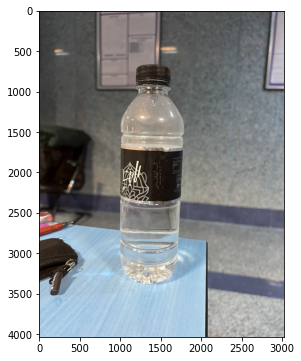

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
my_image = cv2.imread('/content/drive/MyDrive/IMG_6491.JPG')
plt.figure(figsize=(8, 6))
plt.imshow(my_image)

I define a function called center_crop_and_resize, which preprocesses the data and makes it ready for the EfficientNet model input.

In [ ]:
def center_crop_and_resize(image, image_size, crop_padding=32):
    assert image.ndim in {2, 3}

    h, w = image.shape[:2]

    padded_center_crop_size = int(
        (image_size / (image_size + crop_padding)) * min(h, w)
    )
    offset_height = ((h - padded_center_crop_size) + 1) // 2
    offset_width = ((w - padded_center_crop_size) + 1) // 2

    image_crop = image[
                 offset_height: padded_center_crop_size + offset_height,
                 offset_width: padded_center_crop_size + offset_width,
                 ]
    resized_image = resize(
        image_crop,
        (image_size, image_size),
        preserve_range=True,
    )

    return resized_image

In [ ]:
SIZE = model.input_shape[1]
x = center_crop_and_resize(my_image, SIZE)
x = preprocess_input(x)
x = np.expand_dims(x, 0)
y = model.predict(x)
decode_predictions(y)

35363/35363 [==============================] - 0s 0us/step


[[('n04557648', 'water_bottle', 0.8388538),
  ('n03983396', 'pop_bottle', 0.04256183),
  ('n03916031', 'perfume', 0.014243271),
  ('n02815834', 'beaker', 0.009039973),
  ('n04254120', 'soap_dispenser', 0.008232178)]]

As we see, the model predicts the picture as a **waterbottle** with a probability of 83%, which is true.

# Part C:

If the EfficientNet pretrained over ImageNet doesn't have the correct labels for our image, when we use the full model, all we get is a bunch of incorrectly classified images. In this case, we can delete the top layer, which contains all the classification labels, and create a new classification layer. Another thing that we can do, is comparing the confidence of the predicted label with a threshold. If the level of confidence is lower than that threshold, we will conclude that the label is not correctly predicted.


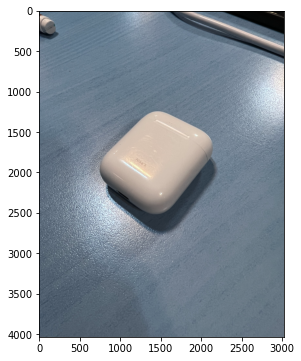

In [ ]:
new_image = cv2.imread('/content/drive/MyDrive/IMG_6515.JPG')
plt.figure(figsize=(8, 6))
plt.imshow(new_image)

In [ ]:
SIZE = model.input_shape[1]
x = center_crop_and_resize(new_image, SIZE)
x = preprocess_input(x)
x = np.expand_dims(x, 0)
y = model.predict(x)
predicted = decode_predictions(y)
decode_predictions(y)

1/1 [==============================] - 0s 23ms/step


[[('n04116512', 'rubber_eraser', 0.47393715),
  ('n04372370', 'switch', 0.20445324),
  ('n04074963', 'remote_control', 0.09120757),
  ('n03777754', 'modem', 0.062107738),
  ('n03793489', 'mouse', 0.011727708)]]

As it can be seen, the predicted labels are all wrong. So we add a threshold and compare the most confident label to that threshold as below:

In [ ]:
def predict_new_class(Input):
    SIZE = model.input_shape[1]
    x = center_crop_and_resize(Input, SIZE)
    x = preprocess_input(x)
    x = np.expand_dims(x, 0)
    y = model.predict(x)
    predicted = decode_predictions(y)
    threshold = 0.5
    if (predicted[0][0][2] < threshold):
        print('The class of the object is not in the defined labels, so it cannot be predicted correctly')
        print('maximum predicted probability', predicted[0][0][2])
    else:
        print(predicted)
        print('maximum predicted probability', predicted[0][0][2])

Checking our first and second images with this function:

In [ ]:
print('Predictions for the Water Bottle:')
predict_new_class(my_image)
print('\nPredictions for the Airpod Case:')
predict_new_class(new_image)

Predictions for the Water Bottle:
1/1 [==============================] - 0s 40ms/step
[[('n04557648', 'water_bottle', 0.8388538), ('n03983396', 'pop_bottle', 0.04256183), ('n03916031', 'perfume', 0.014243271), ('n02815834', 'beaker', 0.009039973), ('n04254120', 'soap_dispenser', 0.008232178)]]
maximum predicted probability 0.8388538

Predictions for the Airpod Case:
1/1 [==============================] - 0s 23ms/step
The class of the object is not in the defined labels, so it cannot be predicted correctly
maximum predicted probability 0.47393715


# Part D)
In this part, I want to change the final layers of the EfficientNet (and freeze the previous layers). So, I define a sequential model, add the base model and add some extra fully connected layers to the end of it. For this purpose, I add two folders, one containing 200 images of pandas and the other containing 200 images of dogs.

In [2]:
from google.colab import drive
drive.mount('/content/drive')
pandas_dir = '/content/drive/MyDrive/Pandas'
dogs_dir = '/content/drive/MyDrive/Dogs'

Mounted at /content/drive


Visualizing a picture from each set:

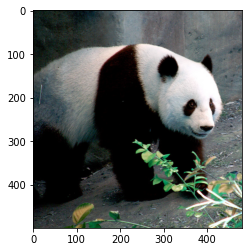

In [4]:
panda_image = cv2.imread('/content/drive/MyDrive/Pandas/panda_00001.jpg')
plt.imshow(panda_image)


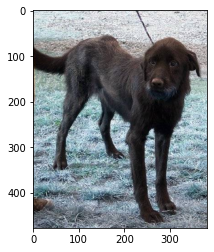

In [5]:
dog_image = cv2.imread('/content/drive/MyDrive/Dogs/dogs_00001.jpg')
plt.imshow(dog_image)

First, I initialize my train set and train labels as below:

In [ ]:
dataset = []
labels = []
for i in range(10):
    data = cv.imread(f'/content/drive/MyDrive/Pandas/panda_0000{i}.jpg')
    labels.append([0]) 
    dataset.append(cv.resize(data,(224,224)))
    data = cv.imread(f'/content/drive/MyDrive/Dogs/dogs_0000{i}.jpg')
    labels.append([1])
    dataset.append(cv.resize(data,(224,224)))

for i in range(10,100):
    data = cv.imread(f'/content/drive/MyDrive/Pandas/panda_000{i}.jpg')
    labels.append([0])
    dataset.append(cv.resize(data,(224,224)))
    data = cv.imread(f'/content/drive/MyDrive/Dogs/dogs_000{i}.jpg')
    labels.append([1])
    dataset.append(cv.resize(data,(224,224)))

for i in range(100,200):
    data = cv.imread(f'/content/drive/MyDrive/Pandas/panda_00{i}.jpg')
    labels.append([0])
    dataset.append(cv.resize(data,(224,224)))
    data = cv.imread(f'/content/drive/MyDrive/Dogs/dogs_00{i}.jpg')
    labels.append([1])
    dataset.append(cv.resize(data,(224,224)))


In [ ]:
dataset = np.array(dataset)
labels = to_categorical(np.array(labels))

Next, I implement my model as below:

I freeze all the layers except the last one (the prediction layer). I add new layers and set the final layer size to 2 (because I have 2 classes of pandas or dogs).

In [ ]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False, weights="imagenet")
base_model.trainable = False
model= Sequential()
model.add(base_model)  
model.add(tfl.GlobalAveragePooling2D())
model.add(tfl.Dropout(0.2))
model.add(Dense(2,activation=('softmax'))) 

I compile and train the new model as below:

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.1),
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(dataset, labels, epochs=10, validation_split=0.4)


Epoch 1/10
8/8 [==============================] - 7s 287ms/step - loss: 0.2254 - accuracy: 0.9042 - val_loss: 0.1517 - val_accuracy: 0.9875
Epoch 2/10
8/8 [==============================] - 1s 101ms/step - loss: 2.0952e-05 - accuracy: 1.0000 - val_loss: 0.1553 - val_accuracy: 0.9875
Epoch 3/10
8/8 [==============================] - 1s 101ms/step - loss: 0.0275 - accuracy: 0.9958 - val_loss: 0.0882 - val_accuracy: 0.9937
Epoch 4/10
8/8 [==============================] - 1s 105ms/step - loss: 1.2914e-08 - accuracy: 1.0000 - val_loss: 0.0292 - val_accuracy: 0.9937
Epoch 5/10
8/8 [==============================] - 1s 101ms/step - loss: 0.1132 - accuracy: 0.9917 - val_loss: 0.0745 - val_accuracy: 0.9937
Epoch 6/10
8/8 [==============================] - 1s 101ms/step - loss: 1.0444e-06 - accuracy: 1.0000 - val_loss: 0.1097 - val_accuracy: 0.9937
Epoch 7/10
8/8 [==============================] - 1s 103ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1262 - val_accuracy: 0.9937
Epoc

As it can be seen, we get a very good accuracy on the validation and train sets. So, the model is very good in differentiating pandas from dogs.